# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [194]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [195]:
# Checking the number of mice.
len(data_complete.value_counts("Mouse ID"))

249

In [196]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_complete[data_complete.duplicated()]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [197]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = data_complete.loc[data_complete["Mouse ID"] == "g989"]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [198]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = data_complete[data_complete["Mouse ID"] != "g989"]
df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [199]:
# Checking the number of mice in the clean DataFrame.
len(df_cleaned["Mouse ID"].value_counts())

248

## Summary Statistics

In [200]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = df_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians = df_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances = df_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stds = df_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sems = df_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume":means,
    "Median Tumor Volume":medians,
    "Tumor Volume Variance":variances,
    "Tumor Volume Std. Dev.":stds,
    "Tumor Volume Std. Err.":sems
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
df_cleaned.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

C:\Users\aloun\AppData\Local\Temp\ipykernel_17524\3939097590.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_cleaned.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

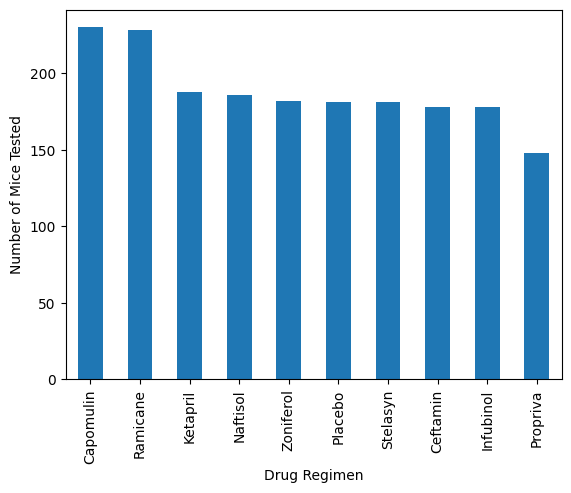

In [202]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# grouping by drug regimen, and sorting from greatest to least
counts_per_drug = df_cleaned.groupby(["Drug Regimen"]).count()['Mouse ID'].sort_values(ascending=False)

# creating and printing the bar plot
counts_per_drug.plot.bar()
plt.ylabel("Number of Mice Tested")
plt.show()

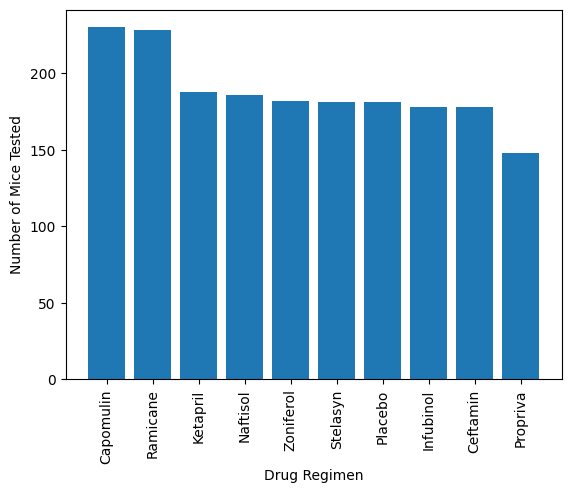

In [203]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# setting the x ticks
x_axis = [i for i in range(len(df_cleaned["Drug Regimen"].value_counts()))]
tick_locations = [value for value in x_axis]
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
plt.xticks(tick_locations, drugs, rotation="vertical")

# setting labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# creating the graph
plt.bar(x_axis, counts_per_drug)

# printing the graph
plt.show()

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# we can't group by just Mouse ID because then there would be no Sex column to group by afterwards, so we group by both columns here
groupby_sex = df_cleaned.groupby(["Mouse ID", "Sex"])
sex_df = pd.DataFrame(groupby_sex.size())

# grouping by Sex again
groupby_sex_twice = sex_df.groupby(["Sex"])

# creating a dataframe with no column name(s)
sex_df = pd.DataFrame(groupby_sex_twice.size())
sex_df


,0
Sex,
Female,123
Male,125


In [254]:

# naming the column
sex_df.columns = ['Total']
display(sex_df)

# compute the percentages
sex_df["Percentage"] = (sex_df['Total'] / sex_df["Total"].sum()) * 100
display(sex_df)

,Total
Sex,
Female,123
Male,125


,Total,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


<Axes: ylabel='Percentage of Sex'>

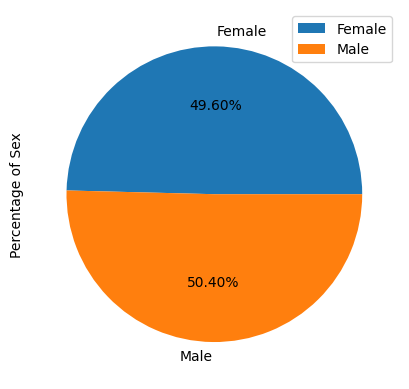

In [205]:
# "pie requires either y column or 'subplots=True'"
sex_df.plot.pie(y="Percentage of Sex", autopct="%.2f%%")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([<matplotlib.patches.Wedge at 0x1a11dd88100>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.60%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.40%')])

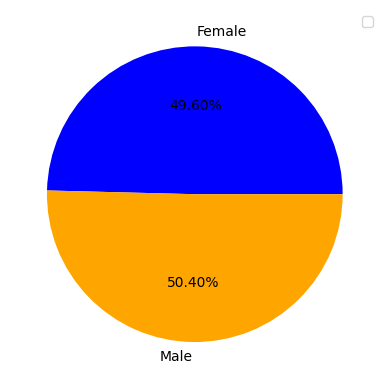

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
colors = ["blue", "orange"]
# getting the values
values = sex_df["Total"]
# making the plot
plt.legend(loc="best")
plt.pie(values, labels=labels, colors=colors, autopct="%.2f%%")

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [53]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [158]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# select only Capomulin data
df_capomulin = df_cleaned[df_cleaned["Drug Regimen"] == "Capomulin"]
df_capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [160]:
df_b128 = df_capomulin.loc[df_capomulin["Mouse ID"] == "b128"]
df_b128.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


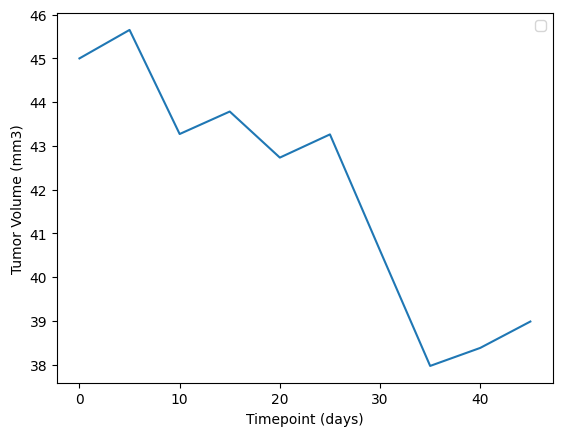

In [156]:

# create Series of tumor volume for each mouse
tumor_volumes = df_b128["Tumor Volume (mm3)"]
# print(tumor_volumes.size())

# create Series of Timepoints for each mouse
times = df_b128["Timepoint"]
# print(times.size())

# making the plot
plt.plot(times, tumor_volumes)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

In [161]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Capomulin data
df_capomulin.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


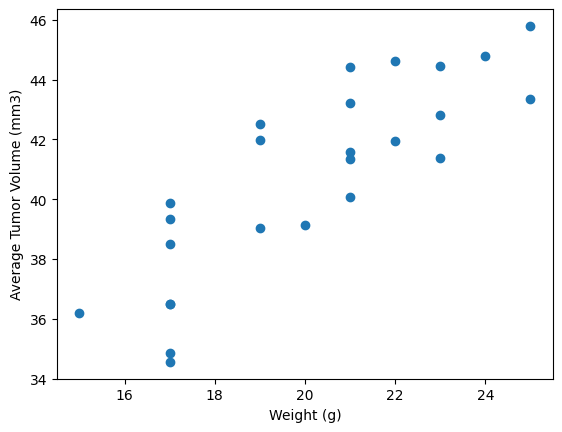

In [222]:
groupby_mouse_id = df_capomulin.groupby("Mouse ID")

# x axis
weight = groupby_mouse_id.max()["Weight (g)"]

# y axis
avg_tumor_volume = groupby_mouse_id.mean()["Tumor Volume (mm3)"]

# making the plot
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



Weight (g)
